In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np




In [5]:
dataset = pd.read_csv('/content/housing.csv')
print ('Here are the first ten records of the dataset:')
dataset=dataset.dropna()
dataset.head(10)

Here are the first ten records of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

NameError: ignored

In [7]:
fig, (ax1,ax2) = plt. subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x,y)
ax2.plot(x+1, -y)

NameError: ignored

In [0]:
Y=dataset['median_house_value']
X=dataset.loc[:,'longitude':'median_income']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train_np=x_train.to_numpy()
y_train_np=y_train.to_numpy()
x_test_np=x_test.to_numpy()
y_test_np=y_test.to_numpy()

In [0]:
import torch
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.utils.data import DataLoader,TensorDataset

In [11]:
from torch.optim import SGD,RMSprop
from torch.nn import L1Loss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score



     |████████████████████████████████| 112kB 8.8MB/s 


In [0]:
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs) :
    super(CnnRegressor,self).__init__()
    self.batch_size=batch_size
    self.inputs=inputs
    self.outputs=outputs
    self.input_layer=Conv1d(inputs,batch_size,1)
    self.max_pooling_layer=MaxPool1d(1)
    self.conv_layer=Conv1d(batch_size,128,1)
    self.flatten_layer=Flatten()
    self.linear_layer=Linear(128,64) 
    self.output_layer=Linear(64,outputs)
  def forward(self,input):
    input= input.reshape((self.batch_size, self.inputs, 1))
    output=relu(self.input_layer(input))
    output=self.max_pooling_layer(output)
    output=relu(self.conv_layer(output))
    output=self.flatten_layer(output)
    output=self.linear_layer(output)
    output = self.output_layer(output)
    return output

In [0]:
def model_loss(model,dataset,train=False,optimizer=None):
  performance=L1Loss()
  score_metric=R2Score()
  avg_loss=0
  avg_score=0
  count=0
  for input,output in iter(dataset):
    predictions=model.forward(input)
    loss=performance(predictions,output)
    score_metric.update([predictions,output])
    score=score_metric.compute()
    if(train) :
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    avg_loss += loss.item()
    avg_score += score
    count += 1
  return avg_loss / count,avg_score / count




In [23]:
batch_size=32
model=CnnRegressor(batch_size,X.shape[1],1)
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 32, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(32, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [24]:
epochs=100
optimizer=RMSprop(model.parameters(),lr=0.02)
inputs=torch.from_numpy(x_train_np).cuda().float()
outputs=torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()
tensor=TensorDataset(inputs,outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)
for epoch in range(epochs):
  avg_loss,avg_r2_score=model_loss(model,loader,train=True,optimizer=optimizer)
  print("Epoch"+str(epoch+1)+":\n\tLoss="+str(avg_loss)+"\n\tR^2Score="+str(avg_r2_score))


Epoch1:
	Loss=92445.56695772058
	R^2Score=-0.7081819144932593
Epoch2:
	Loss=79298.45400582108
	R^2Score=0.17057350791053405
Epoch3:
	Loss=76224.35376072304
	R^2Score=0.2303088040299687
Epoch4:
	Loss=72705.35672487745
	R^2Score=0.2858446050320677
Epoch5:
	Loss=71929.8972120098
	R^2Score=0.30362650497768756
Epoch6:
	Loss=69726.67202052697
	R^2Score=0.36882834652208407
Epoch7:
	Loss=68855.019921875
	R^2Score=0.3757915168831183
Epoch8:
	Loss=67701.78046109069
	R^2Score=0.3814081289516943
Epoch9:
	Loss=66830.2556908701
	R^2Score=0.4088711781991571
Epoch10:
	Loss=66033.43667279412
	R^2Score=0.4158885970425709
Epoch11:
	Loss=65412.03740042892
	R^2Score=0.43199704534850136
Epoch12:
	Loss=64191.421614583334
	R^2Score=0.4515911243634377
Epoch13:
	Loss=63872.68511795343
	R^2Score=0.4507391723087694
Epoch14:
	Loss=63015.68271292892
	R^2Score=0.4687256054695731
Epoch15:
	Loss=62620.83439797794
	R^2Score=0.4915106044252579
Epoch16:
	Loss=61647.47375153186
	R^2Score=0.49891795553219037
Epoch17:
	Loss

In [16]:
inputs=torch.from_numpy(x_test_np).cuda().float()
outputs=torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()
tensor=TensorDataset(inputs,outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)
avg_loss, avg_r2_score = model_loss(model,loader)
print("Themodel'sL1lossis:"+str(avg_loss))
print("Themodel'sR^2scoreis:"+str(avg_r2_score))

                  
                  

Themodel'sL1lossis:46390.42362819882
Themodel'sR^2scoreis:0.6668310230085349


## Saving the trained model

In [0]:
torch.save(model, '1113852_1dconv_reg')

## Loading the saved model

In [0]:
saved_model = torch.load('1113852_1dconv_reg')

In [28]:
inputs=torch.from_numpy(x_test_np).cuda().float()
outputs=torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()
tensor=TensorDataset(inputs,outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)
avg_loss, avg_r2_score = model_loss(saved_model,loader)
print("Themodel'sL1lossis:"+str(avg_loss))
print("Themodel'sR^2scoreis:"+str(avg_r2_score))

Themodel'sL1lossis:52565.22748523622
Themodel'sR^2scoreis:0.65258112576267


In [0]:
df = dataset.copy()
df = df.drop(columns=['ocean_proximity'])
df = df[:20]

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44c5f53e10>,
      dtype=object)

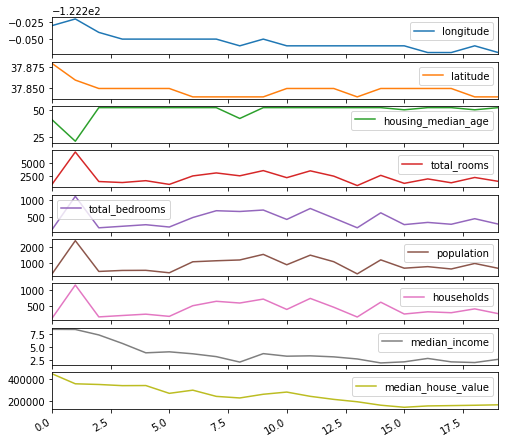

In [31]:
 df.plot(subplots=True, figsize=(8, 8))
